# Guía 5 - Transformada Z

## Ejercicio 3

Considere el sistema
$$
H(z) = \frac{1-2z^{-1} + 2z^{-2} - z^{-3}}{(1-z^{-1})(1-0.5z^{-1})(1-0.2z^{-1})}
$$
1. Dibuje el diagrama de polos y ceros. ¿Es estable el sistema?
2. Determine la respuesta al impulso del sistema.

Para ello, examine las opciones de los comandos `zplane` y `roots`

### Solución

1. Para determinar los polos y ceros, debemos encontrar los valores de z que hacen cero al denominador y numerador, respectivamente

Podemos determinar los polos ($1,0.5,0.2$) a simple vista en la forma factorizada del denominador, pero para hacerlo usando numpy es mejor expresar $H(z)$ con su denominador en forma polinómica
$$
H(z) = \frac{1-2z^{-1} + 2z^{-2} - z^{-3}}{1 - \frac{17}{10}z^{-1} + \frac{4}{5}z^{-2} -\frac{1}{10}z^{-3}}
$$

No es estable porque tiene un polo sobre el círculo unitario. Para cumplir la condición de estabilidad debería estar _dentro_ del círculo unitario.

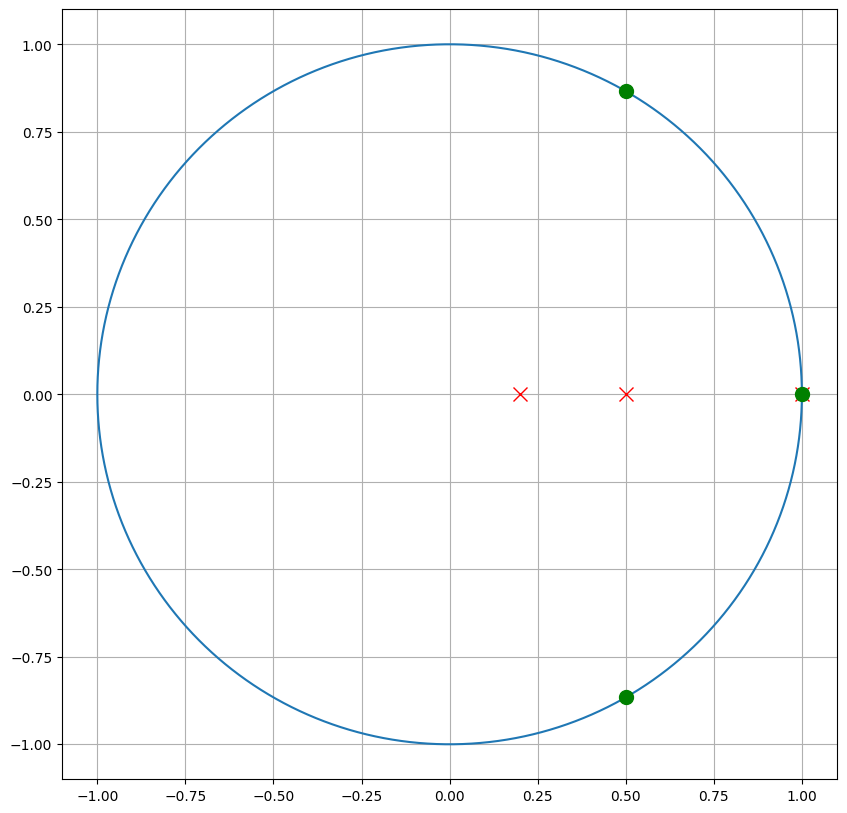

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# coeficientes
a = [1, -2, 2, -1]
b = [1, -1.7, 0.8, -0.1]

# polos
polos = np.roots(b)

# ceros
zeros = np.roots(a)

# Circulo unitario
ang = np.linspace(0,2*np.pi,10000,endpoint=False)
circulo = [np.cos(ang),np.sin(ang)]

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax.grid()

plt.plot(circulo[0],circulo[1])
# polos
plt.plot(polos.real, polos.imag, 'rx', ms=10)
plt.plot(zeros.real, zeros.imag, 'go', ms=10)

2. Para determinar la respuesta al impulso podemos simplemente llegar de $H(z)$ a la ecuación en diferencias
$$
\begin{align*}
    H(z) = \frac{Y(z)}{X(z)} &= \frac{1-2z^{-1} + 2z^{-2} - z^{-3}}{1 - \frac{17}{10}z^{-1} + \frac{4}{5}z^{-2} -\frac{1}{10}z^{-3}}\\
    Y(z) \left( 1 - \frac{17}{10}z^{-1} + \frac{4}{5}z^{-2} -\frac{1}{10}z^{-3} \right) &= X(z) \left( 1-2z^{-1} + 2z^{-2} - z^{-3} \right)\\
    Y(z) - \frac{17}{10}Y(z)z^{-1} + \frac{4}{5}Y(z)z^{-2} -\frac{1}{10}Y(z)z^{-3} &= X(z) - 2X(z)z^{-1} + 2X(z)z^{-2} - X(z)z^{-3}\\
    y[n] - \frac{17}{10}y[n-1] + \frac{4}{5}y[n-2] -\frac{1}{10}y[n-3] &= x[n] - 2x[n-1] + 2x[n-2] - x[n-3]\\
    y[n] &= \frac{17}{10}y[n-1] - \frac{4}{5}y[n-2] + \frac{1}{10}y[n-3] + x[n] - 2x[n-1] + 2x[n-2] - x[n-3]\\
\end{align*}
$$

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
 -3.00000000e-01  6.90000000e-01  5.13000000e-01  2.90100000e-01
  1.51770000e-01  7.72290000e-02  3.88833000e-02  1.94954100e-02
  9.75845700e-03  4.88137890e-03  2.44111953e-03  1.22064578e-03
  6.10340094e-04  3.05173487e-04  1.52587432e-04  7.62938536e-05]


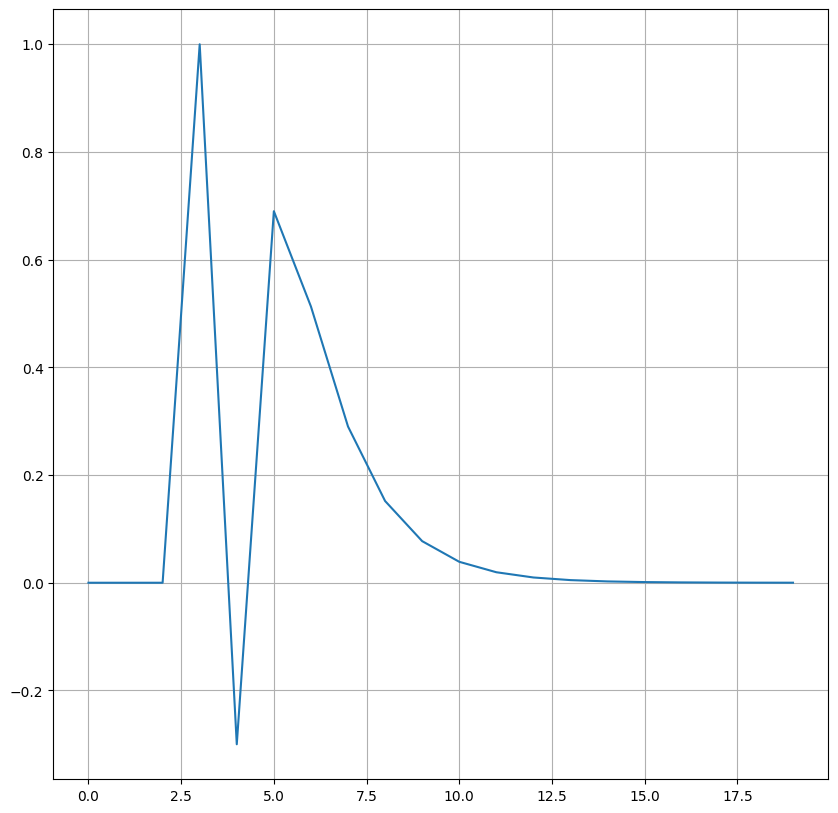

In [2]:
# respuesta al impulso
N = 20
x = np.zeros(N)
x[3] = 1
y = np.zeros(N)
for n in range(3,N):
    y[n] = 1.7*y[n-1] - 0.8*y[n-2] + 0.1*y[n-3] + x[n] - 2*x[n-1] + 2*x[n-2] - x[n-3]

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax.grid()

plt.plot(np.arange(N),y)
print(y)

![imagen](https://raw.githubusercontent.com/Lucasa98/PDS-2025/1b3dc4671798f95d2bdce48153d86167599ad378/Practica/rsc/fig5z-3-1.png)